# Visual analysis with model prediction of factors affecting bitcoin market status and investment suggestion 
# Course: CS677
# Author: Pengfei Ma


## Introduction

  Global economics has experienced strong increasing over 10 years. Especially in US stock market, investors successfully raised the volume of market twice. The market created the number of millionaires over a decade; however, the global pandemic strongly punched the economics. As a result, the stock market fused several times in a very short period. With the continuous implementation of the Fed’s quantitative easing policy, the composite is not only backing to increase, but also created a record high. Among millions of products, several products became the super star, such as Tesla, Zoom, and GameStop. But compared with Bitcoin, these products look not that shiny. Bitcoin, as a virtual digital encryption currency, once became the gold of investors this year. The value of Bitcoin once exceeded 60,000 US dollars, which is more than 20 times more than 5 years ago. However, according to Bitcoin's own characteristics and algorithms, the number of Bitcoins will decrease, and the time and cost of mining a Bitcoin will increase exponentially. So, does the price of bitcoin have anything to do with the current mining cost of a bitcoin and the number of bitcoins in the market? Therefore, this project will focus on the historical data of Bitcoin in the past 10 years to analyze that What are the most important factors influencing Bitcoin price.

## I - Project Map

In [164]:
from PIL import Image

In [165]:
project_map = Image.open('project map.png')

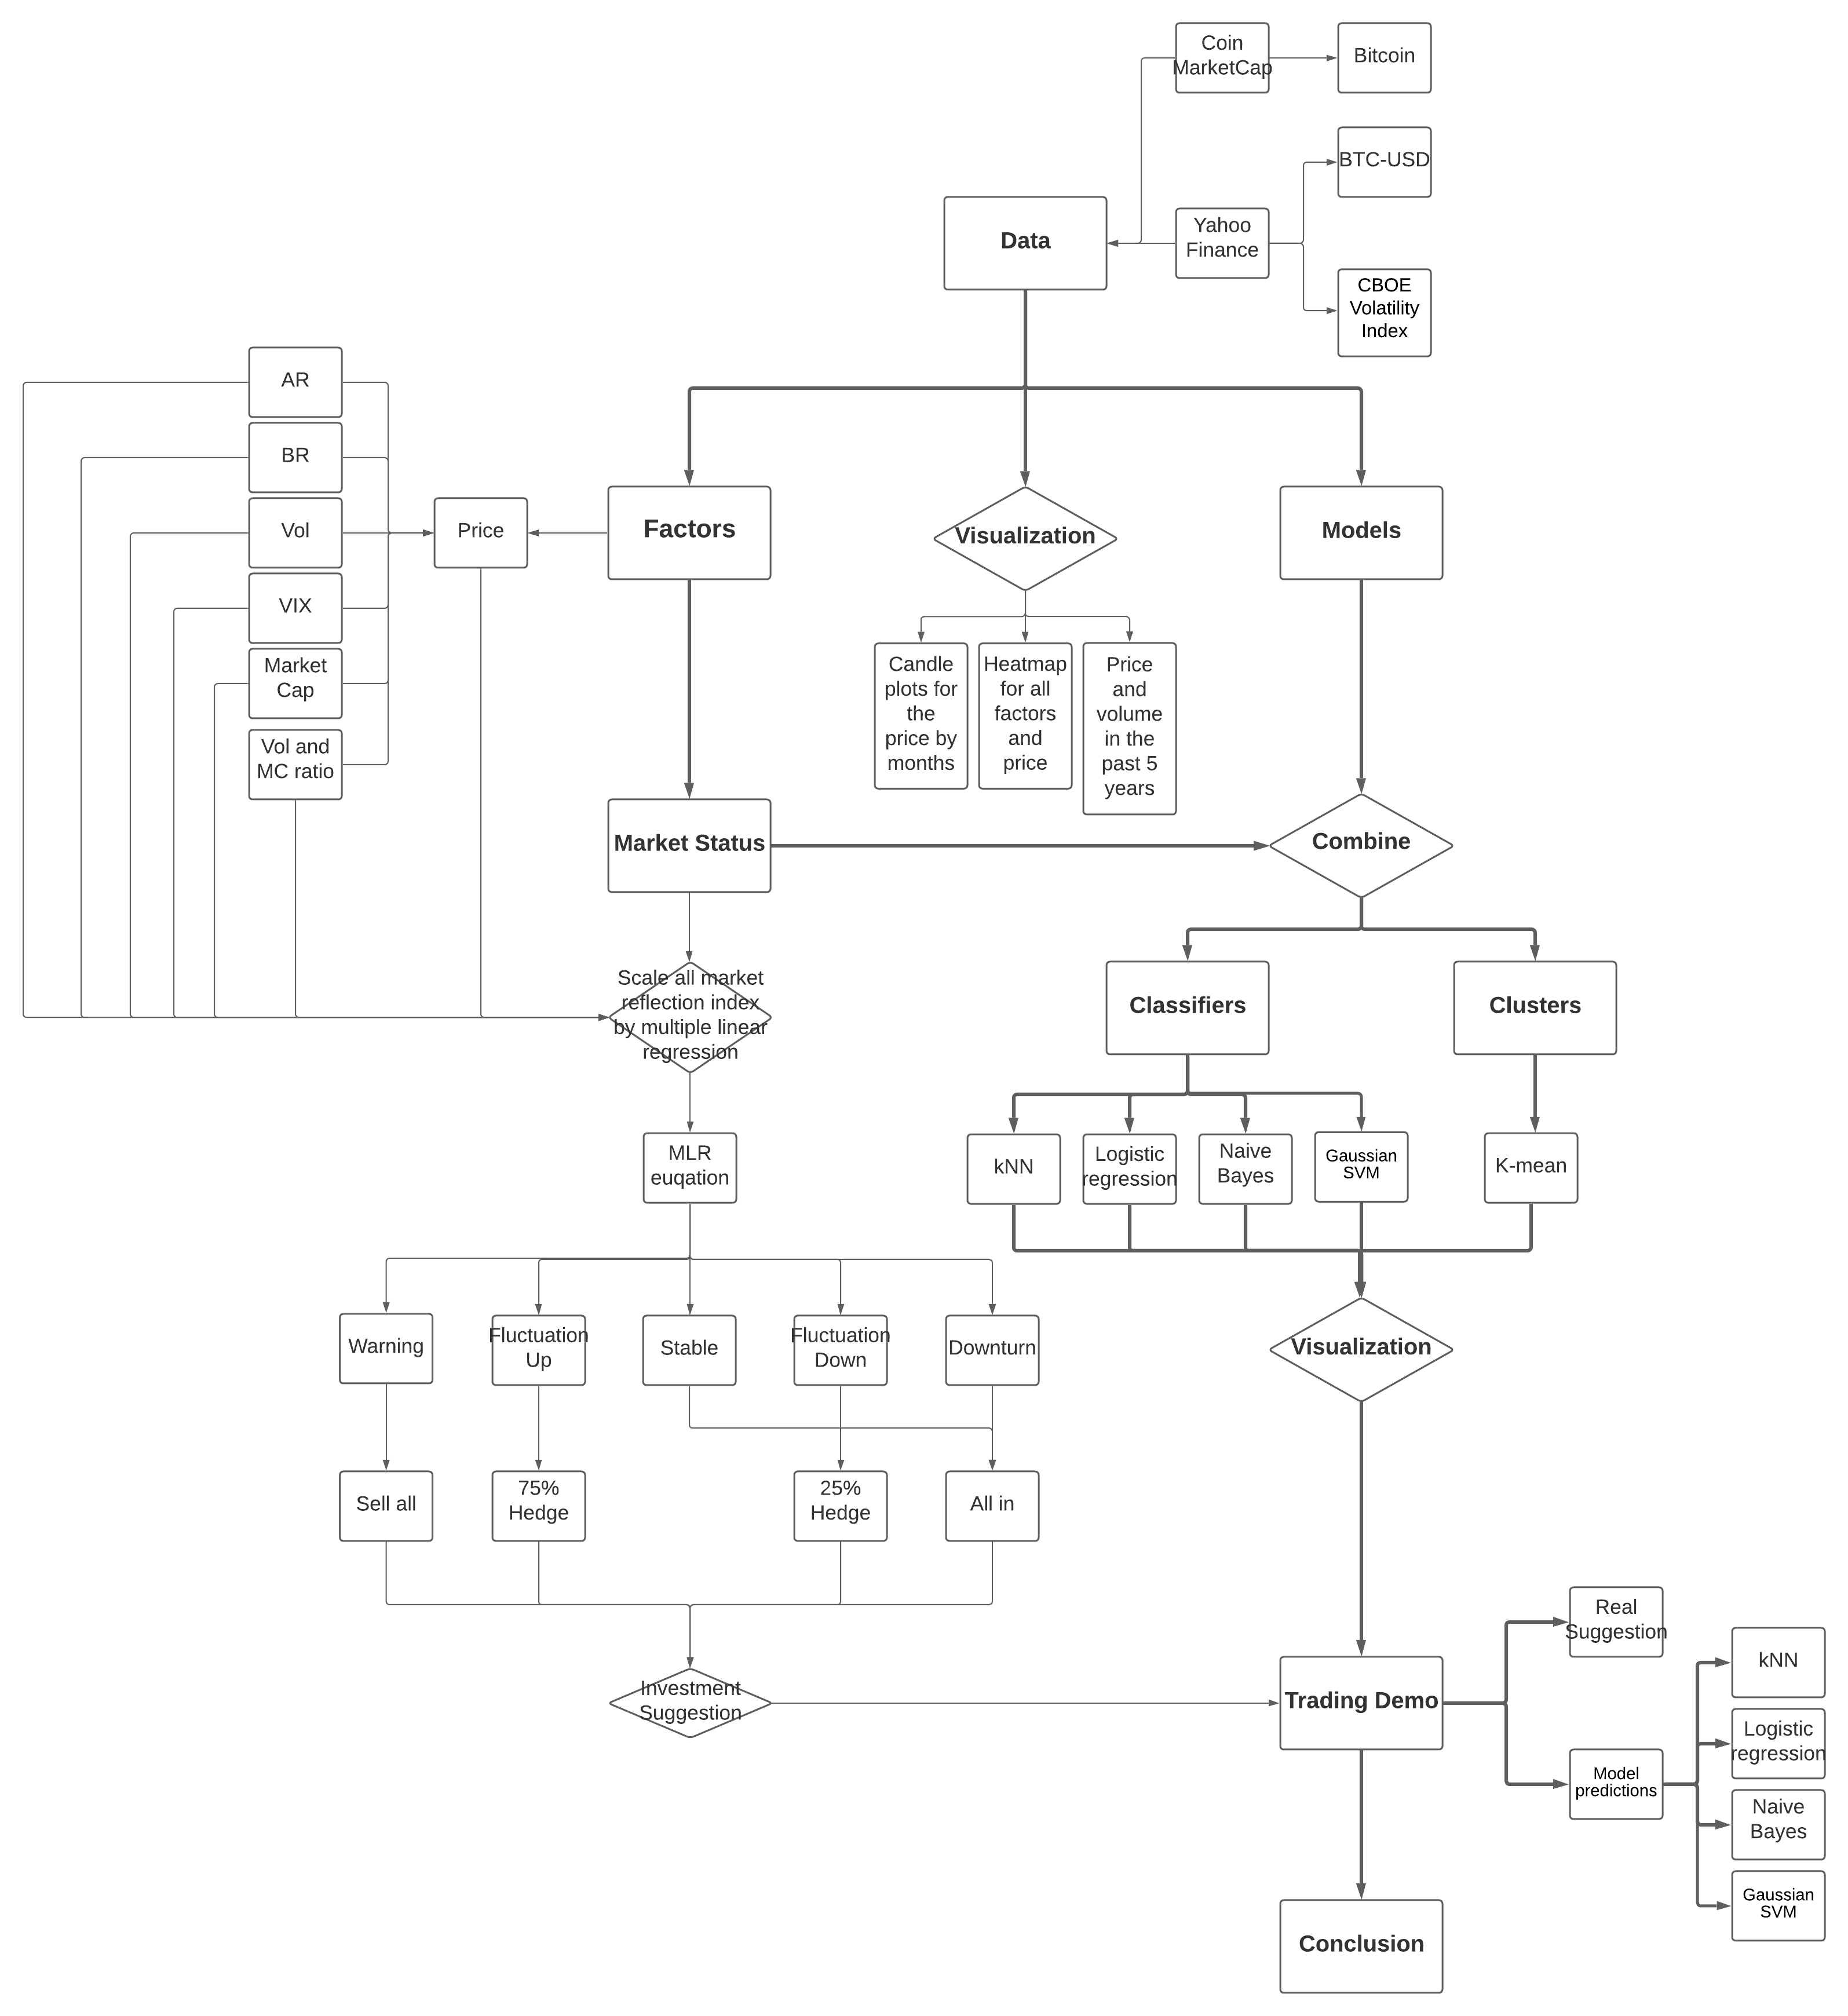

In [166]:
project_map

## II - Data Preparation
## 1. Data cleaning and collecting

### Websites: Yahoo Finance, CoinMarketCap
### Datasets: BTC-USD_daily, BTC-USD_weekly, BTC-USD_weekly_detailed, VIX_daily, MarketCap_daily
### Values: AR, BR, MC, VMR

In [4]:
from pandas_datareader import data as web
import os
import math
import numpy as np 
import pandas as pd

### Datasets
#### > BTC-USD_daily

In [5]:
# collect daliy info for BTC-USD from 2016-01-01 to 2021-04-23

def get_stock(ticker, start_date, end_date, s_window, l_window):
    try:
        df = web.get_data_yahoo(ticker, start=start_date, end=end_date)
        df['Return'] = df['Adj Close'].pct_change()
        df['Return'].fillna(0, inplace = True)
        df['Date'] = df.index
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year 
        df['Day'] = df['Date'].dt.day
        for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
            df[col] = df[col].round(2)
        df['Weekday'] = df['Date'].dt.weekday_name  
#        df['Weekday'] = df['Date'].dt.day_name       
        df['Week_Number'] = df['Date'].dt.strftime('%U')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')       
        col_list = ['Date', 'Year', 'Month', 'Day', 'Weekday', 
                    'Week_Number', 'Year_Week', 'Open', 
                    'High', 'Low', 'Close', 'Volume', 'Adj Close',
                    'Return']
        num_lines = len(df)
        df = df[col_list]
        print('read ', num_lines, ' lines of data for ticker: ' , ticker)
        return df
    except Exception as error:
        print(error)
        return None

try:
    ticker='BTC-USD'
    input_dir = r'/Users/mapengfei/Desktop/BU CS/Spring 2021/CS677/project'
    output_file = os.path.join(input_dir, ticker + '_daily.csv')
    df = get_stock(ticker, start_date='2016-01-01', end_date='2021-04-23', 
               s_window=14, l_window=50)
    df.to_csv(output_file, index=False)
    print('wrote ' + str(len(df)) + ' lines to file: ' + output_file)
except Exception as e:
    print(e)
    print('failed to get Yahoo stock data for ticker: ', ticker)



read  1937  lines of data for ticker:  BTC-USD
wrote 1937 lines to file: /Users/mapengfei/Desktop/BU CS/Spring 2021/CS677/project/BTC-USD_daily.csv


In [5]:
BTC_daily = pd.read_csv('BTC-USD_daily.csv')

In [6]:
BTC_daily

Date  Year  Month  Day    Weekday  Week_Number Year_Week  \
0     2016-01-01  2016      1    1     Friday            0   2016-00   
1     2016-01-02  2016      1    2   Saturday            0   2016-00   
2     2016-01-03  2016      1    3     Sunday            1   2016-01   
3     2016-01-04  2016      1    4     Monday            1   2016-01   
4     2016-01-05  2016      1    5    Tuesday            1   2016-01   
...          ...   ...    ...  ...        ...          ...       ...   
1932  2021-04-19  2021      4   19     Monday           16   2021-16   
1933  2021-04-20  2021      4   20    Tuesday           16   2021-16   
1934  2021-04-21  2021      4   21  Wednesday           16   2021-16   
1935  2021-04-22  2021      4   22   Thursday           16   2021-16   
1936  2021-04-23  2021      4   23     Friday           16   2021-16   

          Open      High       Low     Close        Volume  Adj Close  \
0       430.72    436.25    427.52    434.33  3.627890e+07     434.33   
1       434.62    436.06    431.87    433.44  3.009660e+07     433.44   
2       433.58    433.74    424.71    430.01  3.963380e+07     430.01   
3       430.06    434.52    429.08    433.09  3.847750e+07     433.09   
4       433.07    434.18    429.68    431.96  3.452260e+07     431.96   
...        ...       ...       ...       ...           ...        ...   
1932  55681.79  57062.15  53448.05  56473.03  6.784932e+10   56473.03   
1933  56471.13  56757.97  53695.47  53906.09  5.492661e+10   53906.09   
1934  53857.11  55410.23  50583.81  51762.27  7.479863e+10   51762.27   
1935  51739.81  52120.79  47714.66  51093.65  8.666867e+10   51093.65   
1936  51143.23  51167.56  48805.29  50050.87  4.901449e+10   50050.87   

        Return  
0     0.000000  
1    -0.002063  
2    -0.007907  
3     0.007163  
4    -0.002611  
...        ...  
1932  0.013437  
1933 -0.045454  
1934 -0.039769  
1935 -0.012917  
1936 -0.020409  

[1937 rows x 14 columns]

#### >> BTC-USD_weekly & BTC-USD_weekly_detailed

In [8]:
# collect weekly info for BTC-USD from 2016-01-01 to 2021-04-23

ticker='BTC-USD'
input_dir = r'/Users/mapengfei/Desktop/BU CS/Spring 2021/CS677/project'
output_file = os.path.join(input_dir, ticker + '_weekly_return_volatility.csv')

try:
    df = web.get_data_yahoo(ticker, start='2016-01-01',end='2021-04-23')
    df['Return'] = df['Adj Close'].pct_change()
    df['Return'].fillna(0, inplace = True)
    df['Return'] = 100.0 * df['Return']
    df['Return'] = df['Return'].round(3)        
    df['Date'] = df.index
    df['Date'] = pd.to_datetime(df['Date'])
    df['Week_Number'] = df['Date'].dt.strftime('%U')
    df['Year'] = df['Date'].dt.year 
    df_2 = df[['Year', 'Week_Number', 'Return']]
    df_2.index = range(len(df))
    df_grouped = df_2.groupby(['Year', 'Week_Number'])['Return'].agg([np.mean, np.std])
    df_grouped.reset_index(['Year', 'Week_Number'], inplace=True)
    df_grouped.rename(columns={'mean': 'mean_return', 'std':'volatility'}, inplace=True)
    df_grouped.fillna(0, inplace=True)
    df_grouped.to_csv(output_file, index=False)

#    df_grouped_2 = df_grouped.fillna(0)
#    df_grouped_2.to_csv(output_file, index=False)
    
except Exception as e:
    print(e)


output_file = os.path.join(input_dir, ticker + '_weekly_return_volatility_detailed.csv')
combined_df = df.merge(df_grouped, on=['Year', 'Week_Number'], how = 'inner')
combined_df.to_csv(output_file, index=False)
print("wrote ", len(combined_df), " file to ", output_file)

wrote  1936  file to  /Users/mapengfei/Desktop/BU CS/Spring 2021/CS677/project/BTC-USD_weekly_return_volatility_detailed.csv


In [7]:
BTC_weekly = pd.read_csv('BTC-USD_weekly.csv')
BTC_weekly_detail = pd.read_csv('BTC-USD_weekly_detailed.csv')

In [8]:
BTC_weekly

Year  Week_Number  mean_return  volatility
0    2016            0    -0.103000    0.145664
1    2016            1     0.493714    2.830678
2    2016            2    -1.837286    6.594218
3    2016            3     0.117143    5.338057
4    2016            4    -0.317143    2.501314
..    ...          ...          ...         ...
277  2021           12    -0.519286    3.885298
278  2021           13     0.624125    1.876499
279  2021           14     0.375857    2.550073
280  2021           15    -0.906000    3.982927
281  2021           16    -2.084400    2.394476

[282 rows x 4 columns]

In [9]:
BTC_weekly_detail

High           Low          Open         Close        Volume  \
0       436.246002    427.515015    430.721008    434.334015  3.627890e+07   
1       436.062012    431.869995    434.622009    433.437988  3.009660e+07   
2       433.743011    424.705994    433.578003    430.010986  3.963380e+07   
3       434.516998    429.084015    430.061005    433.091003  3.847750e+07   
4       434.182007    429.675995    433.069000    431.959991  3.452260e+07   
...            ...           ...           ...           ...           ...   
1931  57520.054688  54368.593750  56191.585938  55724.265625  6.534487e+10   
1932  57062.148438  53448.046875  55681.792969  56473.031250  6.784932e+10   
1933  56757.972656  53695.468750  56471.128906  53906.089844  5.492661e+10   
1934  55410.230469  50583.812500  53857.105469  51762.273438  7.479863e+10   
1935  52120.792969  47814.691406  50953.339844  50535.886719  8.732182e+10   

         Adj Close  Return        Date  Week_Number  Year  mean_return  \
0       434.334015   0.000  2016-01-01            0  2016    -0.103000   
1       433.437988  -0.206  2016-01-02            0  2016    -0.103000   
2       430.010986  -0.791  2016-01-03            1  2016     0.493714   
3       433.091003   0.716  2016-01-04            1  2016     0.493714   
4       431.959991  -0.261  2016-01-05            1  2016     0.493714   
...            ...     ...         ...          ...   ...          ...   
1931  55724.265625  -0.875  2021-04-18           16  2021    -2.084400   
1932  56473.031250   1.344  2021-04-19           16  2021    -2.084400   
1933  53906.089844  -4.545  2021-04-20           16  2021    -2.084400   
1934  51762.273438  -3.977  2021-04-21           16  2021    -2.084400   
1935  50535.886719  -2.369  2021-04-23           16  2021    -2.084400   

      volatility  
0       0.145664  
1       0.145664  
2       2.830678  
3       2.830678  
4       2.830678  
...          ...  
1931    2.394476  
1932    2.394476  
1933    2.394476  
1934    2.394476  
1935    2.394476  

[1936 rows x 12 columns]

#### >>> VIX index

In [90]:
# collect daliy info for VIX index from 2016-01-01 to 2021-04-23

def get_stock(ticker, start_date, end_date, s_window, l_window):
    try:
        df = web.get_data_yahoo(ticker, start=start_date, end=end_date)
        df['Return'] = df['Adj Close'].pct_change()
        df['Return'].fillna(0, inplace = True)
        df['Date'] = df.index
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year 
        df['Day'] = df['Date'].dt.day
        for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
            df[col] = df[col].round(2)
        df['Weekday'] = df['Date'].dt.weekday_name  
#        df['Weekday'] = df['Date'].dt.day_name       
        df['Week_Number'] = df['Date'].dt.strftime('%U')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')        
        col_list = ['Date', 'Year', 'Month', 'Day', 'Weekday', 
                    'Week_Number', 'Year_Week', 'Open', 
                    'High', 'Low', 'Close', 'Volume', 'Adj Close',
                    'Return']
        num_lines = len(df)
        df = df[col_list]
        print('read ', num_lines, ' lines of data for ticker: ' , ticker)
        return df
    except Exception as error:
        print(error)
        return None

try:
    ticker='^VIX'
    input_dir = r'/Users/mapengfei/Desktop/BU CS/Spring 2021/CS677/project'
    output_file = os.path.join(input_dir, ticker + '_daily.csv')
    df = get_stock(ticker, start_date='2015-12-31', end_date='2021-04-23', 
               s_window=14, l_window=50)
    df.to_csv(output_file, index=False)
    print('wrote ' + str(len(df)) + ' lines to file: ' + output_file)
except Exception as e:
    print(e)
    print('failed to get Yahoo stock data for ticker: ', ticker)



read  1337  lines of data for ticker:  ^VIX
wrote 1337 lines to file: /Users/mapengfei/Desktop/BU CS/Spring 2021/CS677/project/^VIX_daily.csv


In [11]:
vix = pd.read_csv('^VIX_daily.csv')

In [12]:
vix

Date  Year  Month  Day    Weekday  Week_Number Year_Week   Open  \
0     2015-12-31  2015     12   31   Thursday           52   2015-52  17.97   
1     2016-01-04  2016      1    4     Monday            1   2016-01  22.48   
2     2016-01-05  2016      1    5    Tuesday            1   2016-01  20.75   
3     2016-01-06  2016      1    6  Wednesday            1   2016-01  21.67   
4     2016-01-07  2016      1    7   Thursday            1   2016-01  23.22   
...          ...   ...    ...  ...        ...          ...       ...    ...   
1332  2021-04-19  2021      4   19     Monday           16   2021-16  17.04   
1333  2021-04-20  2021      4   20    Tuesday           16   2021-16  17.36   
1334  2021-04-21  2021      4   21  Wednesday           16   2021-16  18.48   
1335  2021-04-22  2021      4   22   Thursday           16   2021-16  17.28   
1336  2021-04-23  2021      4   23     Friday           16   2021-16  18.56   

       High    Low  Close  Volume  Adj Close    Return  
0     20.39  17.51  18.21       0      18.21  0.000000  
1     23.36  20.67  20.70       0      20.70  0.136738  
2     21.06  19.25  19.34       0      19.34 -0.065701  
3     21.86  19.80  20.59       0      20.59  0.064633  
4     25.86  22.40  24.99       0      24.99  0.213696  
...     ...    ...    ...     ...        ...       ...  
1332  18.61  16.78  17.29       0      17.29  0.064000  
1333  19.70  17.24  18.68       0      18.68  0.080393  
1334  19.29  16.91  17.50       0      17.50 -0.063169  
1335  19.90  16.99  18.71       0      18.71  0.069143  
1336  18.78  16.80  17.33       0      17.33 -0.073757  

[1337 rows x 14 columns]

Since only 1336 rows in vix, in order to fit the same length to BTC-USD_daily. The missing items are Saturday and Sunday because Bitcoin trading is 7/24; however, the VIX index is not followed, it is only computed 5/12. So I am going to repeat the Friday data to fill Saturday and Sunday. And for other missing dates, the data will be filled by the data of one day before.

In [13]:
new = pd.merge(BTC_daily, vix, how="left", on=["Date"])

In [14]:
new = new.fillna(0)

In [15]:
vix2 = new[['Date', 'Adj Close_y']]

In [16]:
vix2

Date  Adj Close_y
0     2016-01-01         0.00
1     2016-01-02         0.00
2     2016-01-03         0.00
3     2016-01-04        20.70
4     2016-01-05        19.34
...          ...          ...
1932  2021-04-19        17.29
1933  2021-04-20        18.68
1934  2021-04-21        17.50
1935  2021-04-22        18.71
1936  2021-04-23        17.33

[1937 rows x 2 columns]

Filled out 2016-01-01, 2016-01-02, 2016-01-03 by the vix index of 2015-12-31

In [17]:
vix2 = vix2.replace([0, 1, 2], [18.21, 18.21, 18.21])

In [18]:
vix2 = vix2.rename(columns={"Adj Close_y": "Vix Index"})

In [19]:
vix2

Date  Vix Index
0     2016-01-01      18.21
1     2016-01-02      18.21
2     2016-01-03      18.21
3     2016-01-04      20.70
4     2016-01-05      19.34
...          ...        ...
1932  2021-04-19      17.29
1933  2021-04-20      18.68
1934  2021-04-21      17.50
1935  2021-04-22      18.71
1936  2021-04-23      17.33

[1937 rows x 2 columns]

#### >>>> Market Cap from CoinMarketCap

In [20]:
marketcap = pd.read_csv('BitcoinMarketCap.csv')

In [21]:
marketcap

Date        Open*         High          Low      Close**  \
0     23-Apr-21  $51,739.81   $52,120.79   $47,714.66   $51,093.65    
1     22-Apr-21  $53,857.11   $55,410.23   $50,583.81   $51,762.27    
2     21-Apr-21  $56,471.13   $56,757.97   $53,695.47   $53,906.09    
3     20-Apr-21  $55,681.79   $57,062.15   $53,448.05   $56,473.03    
4     19-Apr-21  $56,191.58   $57,520.05   $54,368.59   $55,724.27    
...         ...          ...          ...          ...          ...   
1933   7-Jan-16     $430.01      $458.77      $429.08      $458.05    
1934   6-Jan-16     $431.86      $431.86      $426.34      $429.11    
1935   5-Jan-16     $433.07      $434.18      $429.68      $431.96    
1936   4-Jan-16     $430.06      $434.52      $429.08      $433.09    
1937   3-Jan-16     $433.58      $433.74      $424.71      $430.01    

                Volume           Market Cap  
0     $86,668,667,320     $954,919,230,092   
1     $74,798,630,778     $967,372,472,375   
2     $54,926,612,466   $1,007,389,534,360   
3     $67,849,323,955   $1,055,323,526,514   
4     $65,344,865,159   $1,041,287,672,154   
...                ...                  ...  
1933      $87,562,200       $6,896,279,078   
1934      $34,042,500       $6,458,942,098   
1935      $34,522,600       $6,500,393,256   
1936      $38,477,500       $6,515,713,340   
1937      $39,633,800       $6,467,429,942   

[1938 rows x 7 columns]

In [22]:
market_cap = []

for number in marketcap['Market Cap']:
    number = number.replace("$", '')
    number = number.replace(",", '')
    market_cap.append(int(number))

In [23]:
# since the order is from present to the past, so we need to reverse the order. And pop out the last element
# because the last element is Apr.23, this date is not contained in other dataframes.

market_cap.reverse()
market_cap.pop(1)

6515713340

### Values
#### >>>>> AR and BR computation

There are a huge element could influence the return of a stock. From the term of Market Sentiment in Finance, the market use AR and BR to scale the market sentiment which is also called Emotion Index for further analysis. 

AR: willingness indicator 
BR: are indicators of the technology to analyze the historical stock price \
I am going to compute the AR and BR as another two influence element to build the model. 

AR = $\frac{\sum_{n=1}^{N} H-O}{\sum_{n=1}^{N} O-L } * 100$ 

BR = $\frac{\sum_{n=1}^{N} H-YC}{\sum_{n=1}^{N} YC-L } * 100$ 

O is Open price 

H is the highest price in a day 

L is the lowest price in a day 

YC is Yesterday close price 

N is the number of trading dates 

In [24]:
AR = []
BR = []

# The Denominator is possible to equal to 0, that will result in infinity of AR and BR. So, replace inf to 10,000

for i in range(len(BTC_daily)):
    
    if i == 0:
        
        upper_ar = BTC_daily["High"][i]-BTC_daily["Open"][i]
        lower_ar = BTC_daily["Open"][i]-BTC_daily["Low"][i]
        
        upper_br = BTC_daily["High"][i]-BTC_daily["Close"][i]
        lower_br = BTC_daily["Close"][i]-BTC_daily["Low"][i]
        
        if lower_ar == 0:
            upper_ar = 2000
            lower_ar = 1
        
        if lower_br == 0:
            upper_br = 2000
            lower_br = 1
            
        ar = upper_ar/lower_ar * 100
        br = upper_br/lower_br * 100
        
        AR.append(ar)
        BR.append(br)
    
    else:
        
        upper_ar = BTC_daily["High"][i]-BTC_daily["Open"][i]
        lower_ar = BTC_daily["Open"][i]-BTC_daily["Low"][i]
        
        upper_br = BTC_daily["High"][i]-BTC_daily["Close"][i]
        lower_br = BTC_daily["Close"][i-1]-BTC_daily["Low"][i-1]
                  
        if lower_ar == 0:
            upper_ar = 2000
            lower_ar = 1
        
        if lower_br == 0:
            upper_br = 2000
            lower_br = 1
            
#         print(upper_br)
#         print(lower_br)
        
#         print(upper_br/lower_br)
#         print(upper_br/lower_br * 100)
        
        ar = upper_ar/lower_ar * 100
        br = upper_br/lower_br * 100
        
        
        AR.append(ar)
        BR.append(br)


#### >>>>>> Volume / MarketCap ratio (VMR)

In [25]:
VMR = []

for i in range(len(BTC_daily)):
    vmr = BTC_daily['Volume'][i] / market_cap[i]
    
    VMR.append(vmr)

## 2. Create the dataframe that only contains necessary elements

In [26]:
data = {'Date': BTC_daily['Date'], "Price":BTC_daily['Adj Close'], 'AR': AR, 'BR': BR, 'Vol':BTC_daily['Volume'], 
        'VIX':vix2['Vix Index'], 'MC': market_cap, 'VMR':VMR}
BTC = pd.DataFrame(data=data)

In [27]:
BTC

Date     Price          AR           BR           Vol    VIX  \
0     2016-01-01    434.33  172.812500    28.193833  3.627890e+07  18.21   
1     2016-01-02    433.44   52.363636    38.472834  3.009660e+07  18.21   
2     2016-01-03    430.01    1.803833   237.579618  3.963380e+07  18.21   
3     2016-01-04    433.09  455.102041    26.981132  3.847750e+07  20.70   
4     2016-01-05    431.96   32.743363    55.361596  3.452260e+07  19.34   
...          ...       ...         ...          ...           ...    ...   
1932  2021-04-19  56473.03   61.795912    43.455683  6.784932e+10  17.29   
1933  2021-04-20  53906.09   10.334119    94.277648  5.492661e+10  18.68   
1934  2021-04-21  51762.27   47.448141  1732.010255  7.479863e+10  17.50   
1935  2021-04-22  51093.65    9.464989    87.159513  8.666867e+10  18.71   
1936  2021-04-23  50050.87    1.040660    33.048041  4.901449e+10  17.33   

                 MC       VMR  
0        6467429942  0.005609  
1        6500393256  0.004630  
2        6458942098  0.006136  
3        6896279078  0.005579  
4        6825700454  0.005058  
...             ...       ...  
1932  1041287672154  0.065159  
1933  1055323526514  0.052047  
1934  1007389534360  0.074250  
1935   967372472375  0.089592  
1936   954919230092  0.051328  

[1937 rows x 8 columns]

## III - Overview of BTC

### 1. Line plot of Bitcoin natural number variables: Price, Volume, Market Cap

In [28]:
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
pyo.init_notebook_mode()

In [29]:
trace0 = go.Candlestick(x=BTC_daily['Date'],
                                     open=BTC_daily['Open'],
                                     high=BTC_daily['High'],
                                     low=BTC_daily['Low'],
                                     close=BTC_daily['Close'])

trace1 = go.Scatter(x= BTC['Date'], y=BTC['Price'],
                    mode='lines',marker_color='blue',name='Price')

data = [trace0, trace1]

layout = go.Layout(title='Bitcoin price envolution overview', xaxis_title="Date",yaxis_title="USD")

fig = go.Figure(data=data, layout = layout)

fig.update_layout(xaxis=dict(
    tickvals = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01','2016-07-01',
               '2016-08-01','2016-09-01','2016-10-01','2016-11-01','2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01','2017-07-01',
               '2017-08-01','2017-09-01','2017-10-01','2017-11-01','2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01','2018-07-01',
               '2018-08-01','2018-09-01','2018-10-01','2018-11-01','2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01','2019-07-01',
               '2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01','2020-07-01',
               '2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01'],
    ticktext = ["Jan 2016", "Feb 2016", "Mar 2016", "Apr 2016", "May 2016", "Jun 2016","Jul 2016", "Aug 2016",
               "Sep 2016", "Oct 2016", "Nov 2016", "Dec 2016",
               "Jan 2017", "Feb 2017", "Mar 2017", "Apr 2017", "May 2017", "Jun 2017","Jul 2017", "Aug 2017",
               "Sep 2017", "Oct 2017", "Nov 2017", "Dec 2017",
               "Jan 2018", "Feb 2018", "Mar 2018", "Apr 2018", "May 2018", "Jun 2018","Jul 2018", "Aug 2018",
               "Sep 2018", "Oct 2018", "Nov 2018", "Dec 2018",
               "Jan 2019", "Feb 2019", "Mar 2019", "Apr 2019", "May 2019", "Jun 2019","Jul 2019", "Aug 2019",
               "Sep 2019", "Oct 2019", "Nov 2019", "Dec 2019",
               "Jan 2020", "Feb 2020", "Mar 2020", "Apr 2020", "May 2020", "Jun 2020","Jul 2020", "Aug 2020",
               "Sep 2020", "Oct 2020", "Nov 2020", "Dec 2020",
               "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021"]))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.2,
            showactive=True,
            buttons=list(
                [
                    dict(
                        label="Candlestick",
                        method="update",
                        args=[
                            {"visible": [True, False]},
                            {"yaxis.title.text": "USD",},
                        ],
                    ),
                    dict(
                        label="Line",
                        method="update",
                        args=[
                            {"visible": [False, True]},
                            {"yaxis.title.text": "USD"},
                        ],
                    ),
                ]
            ),
        )
    ]
)

pyo.plot(fig, filename = 'Bitcoin price envolution overview.html')

fig.show()

In [30]:
x_values = BTC['Date']
y_values = BTC['Price']

trace0 = go.Scatter(x= x_values, y=y_values,
                    mode='lines',name='Bitcoin price')
trace1 = go.Scatter(x= x_values, y=BTC['Vol'],
                    mode='lines',marker_color='orange',name='Vol')
trace2 = go.Scatter(x= x_values, y=BTC['MC'],
                    mode='lines',marker_color='green',name='MC')

data = [trace0, trace1, trace2]

layout = go.Layout(title='Price, Volume, and Market Cap envolution', 
                   xaxis_title="Date",yaxis_title="USD", hovermode='x')

fig = go.Figure(data=data, layout=layout)

fig.update_layout(xaxis=dict(
    tickvals = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01','2016-07-01',
               '2016-08-01','2016-09-01','2016-10-01','2016-11-01','2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01','2017-07-01',
               '2017-08-01','2017-09-01','2017-10-01','2017-11-01','2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01','2018-07-01',
               '2018-08-01','2018-09-01','2018-10-01','2018-11-01','2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01','2019-07-01',
               '2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01','2020-07-01',
               '2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01'],
    ticktext = ["Jan 2016", "Feb 2016", "Mar 2016", "Apr 2016", "May 2016", "Jun 2016","Jul 2016", "Aug 2016",
               "Sep 2016", "Oct 2016", "Nov 2016", "Dec 2016",
               "Jan 2017", "Feb 2017", "Mar 2017", "Apr 2017", "May 2017", "Jun 2017","Jul 2017", "Aug 2017",
               "Sep 2017", "Oct 2017", "Nov 2017", "Dec 2017",
               "Jan 2018", "Feb 2018", "Mar 2018", "Apr 2018", "May 2018", "Jun 2018","Jul 2018", "Aug 2018",
               "Sep 2018", "Oct 2018", "Nov 2018", "Dec 2018",
               "Jan 2019", "Feb 2019", "Mar 2019", "Apr 2019", "May 2019", "Jun 2019","Jul 2019", "Aug 2019",
               "Sep 2019", "Oct 2019", "Nov 2019", "Dec 2019",
               "Jan 2020", "Feb 2020", "Mar 2020", "Apr 2020", "May 2020", "Jun 2020","Jul 2020", "Aug 2020",
               "Sep 2020", "Oct 2020", "Nov 2020", "Dec 2020",
               "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021"]))

fig.update_layout(legend_title_text='Natural number variables')

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.2,
            showactive=True,
            buttons=list(
                [
                    dict(
                        label="Price",
                        method="update",
                        args=[
                            {"visible": [True, False, False]},
                            {"yaxis.title.text": "Price in USD",},
                        ],
                    ),
                    dict(
                        label="Vol",
                        method="update",
                        args=[
                            {"visible": [False, True, False]},
                            {"yaxis.title.text": "Volume in USD"},
                        ],
                    ),
                    dict(
                        label="MC",
                        method="update",
                        args=[
                            {"visible": [False, False, True]},
                            {"yaxis.title.text": "Market Cap in USD"},
                        ],
                    ),
                ]
            ),
        )
    ]
)

pyo.plot(fig, filename = 'Price, Volume, and Market Cap envolution.html')

fig.show()

In [33]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Price','Market Cap', 'Volume'))

fig.add_trace(
    go.Scatter(x= x_values, y=BTC['Price'],
                    mode='lines',marker_color='blue',name='Bitcoin price'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x= x_values, y=BTC['MC'],
                    mode='lines',marker_color='green',name='MC'),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x= x_values, y=BTC['Vol'],
                    mode='lines',marker_color='orange',name='Vol'),
    row=1, col=3
)

fig.update_layout(legend_title_text='Natural number variables',
                  title_text="Comparison of Price, Market Cap, and Volume")

pyo.plot(fig, filename = 'Comparison of Price, Market Cap, and Volume.html')

fig.show()

### 2. Line chart for index variables: AR, BR, VIX, VMR

In [31]:
x_values = BTC['Date']
y_values = BTC['Price']

trace0 = go.Scatter(x= x_values, y=BTC['AR'],
                    mode='lines',marker_color='blue',name='AR')
trace1 = go.Scatter(x= x_values, y=BTC['BR'],
                    mode='lines',marker_color='red',name='BR')

trace2 = go.Scatter(x= x_values, y=BTC['VIX'],
                    mode='lines',marker_color='purple',name='VIX')

trace3 = go.Scatter(x= x_values, y=BTC['VMR'],
                    mode='lines',marker_color='pink',name='VMR')

data = [trace0, trace1, trace2, trace3]

layout = go.Layout(title='Bitcoin Market reflection index', xaxis_title="Date",yaxis_title="Index", hovermode='x')

fig = go.Figure(data=data, layout=layout)

fig.update_layout(xaxis=dict(
    tickvals = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01','2016-07-01',
               '2016-08-01','2016-09-01','2016-10-01','2016-11-01','2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01','2017-07-01',
               '2017-08-01','2017-09-01','2017-10-01','2017-11-01','2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01','2018-07-01',
               '2018-08-01','2018-09-01','2018-10-01','2018-11-01','2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01','2019-07-01',
               '2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01','2020-07-01',
               '2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01'],
    ticktext = ["Jan 2016", "Feb 2016", "Mar 2016", "Apr 2016", "May 2016", "Jun 2016","Jul 2016", "Aug 2016",
               "Sep 2016", "Oct 2016", "Nov 2016", "Dec 2016",
               "Jan 2017", "Feb 2017", "Mar 2017", "Apr 2017", "May 2017", "Jun 2017","Jul 2017", "Aug 2017",
               "Sep 2017", "Oct 2017", "Nov 2017", "Dec 2017",
               "Jan 2018", "Feb 2018", "Mar 2018", "Apr 2018", "May 2018", "Jun 2018","Jul 2018", "Aug 2018",
               "Sep 2018", "Oct 2018", "Nov 2018", "Dec 2018",
               "Jan 2019", "Feb 2019", "Mar 2019", "Apr 2019", "May 2019", "Jun 2019","Jul 2019", "Aug 2019",
               "Sep 2019", "Oct 2019", "Nov 2019", "Dec 2019",
               "Jan 2020", "Feb 2020", "Mar 2020", "Apr 2020", "May 2020", "Jun 2020","Jul 2020", "Aug 2020",
               "Sep 2020", "Oct 2020", "Nov 2020", "Dec 2020",
               "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021"]))

fig.update_layout(legend_title_text='Marketing reflection index')

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.2,
            showactive=True,
            buttons=list(
                [
                    dict(
                        label="AR",
                        method="update",
                        args=[
                            {"visible": [True, False, False, False]},
                            {"yaxis.title.text": "AR index",},
                        ],
                    ),
                    dict(
                        label="BR",
                        method="update",
                        args=[
                            {"visible": [False, True, False, False]},
                            {"yaxis.title.text": "BR index"},
                        ],
                    ),
                    dict(
                        label="VIX",
                        method="update",
                        args=[
                            {"visible": [False, False, True, False]},
                            {"yaxis.title.text": "VIX index"},
                        ],
                    ),
                    dict(
                        label="VMR",
                        method="update",
                        args=[
                            {"visible": [False, False, False, True]},
                            {"yaxis.title.text": "VMR"}
                        ],
                    ),
                ]
            ),
        )
    ]
)

pyo.plot(fig, filename = 'Bitcoin Market reflection index.html')

fig.show()

In [32]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('AR','BR', 'VIX', 'VMR'))

fig.add_trace(
    go.Scatter(x= x_values, y=BTC['AR'],
                    mode='lines',marker_color='blue',name='Bitcoin price'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x= x_values, y=BTC['BR'],
                    mode='lines',marker_color='red',name='MC'),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x= x_values, y=BTC['VIX'],
                    mode='lines',marker_color='purple',name='Vol'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x= x_values, y=BTC['VMR'],
                    mode='lines',marker_color='pink',name='VMR'),
    row=2, col=2
)

fig.update_layout(legend_title_text='Marketing reflection index',
                  title_text="Comparison of AR,BR,VIX, and VMR")

pyo.plot(fig, filename = 'Comparison of AR,BR,VIX, and VMR.html')

fig.show()

### 3. Corresponding correlation matrix for BTC

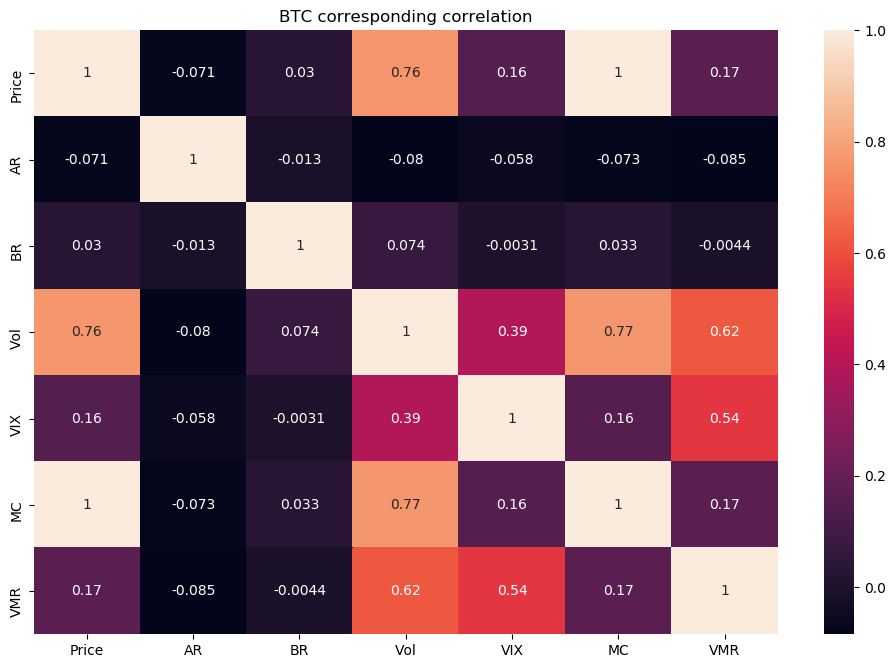

In [33]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
M0 = sns.heatmap(BTC.corr(), annot = True).set_title('BTC corresponding correlation')

plt.savefig("BTC correlation martrix heatmap.png")

## IV - Label Assignment
### Rules
There are 6 important factors in the dataset, the labels will be assigned based on marketing reflection index

#### AR: 
1. AR value of 100 as the central zone, the ± 20, that AR value fluctuations between 80-120, the consolidation market, the stock price trend is relatively stable, does not appear violent fluctuations.

2. AR value is high, said the market is active, strong, too high, said the stock into the high price, should choose the time to exit, AR value of the height of no specific standard, under normal circumstances, AR value rose to 150 or more, the stock may return at any time File down.

3. AR value is lower that the popularity of recession, the need to enrich, too low implies that the stock may be stacked into a trough, can be considered opportunistic intervention, the general AR value fell below 50, the stock may rebound at any time rise.

#### BR:
1. BR value of the wave-sensitive than the AR value, when the BR value fluctuates between 70-150, the consolidation market, should remain on the sidelines.

2. BR value is higher than 300 or more, the stock may fall back at any time, should choose the time to sell; BR value below 50 the following time may rebound at any time to rise, should choose the time to buy.

#### Features
1. AR trend and stock price are in the same direction, AR rises and the market also rises; AR falls and the market also falls.

2. The AR indicator cannot show the strength and weakness of the stock price gap, and can only show the rangeof the stock price fluctuations on the day.

3. AR often advances when the head or bottom is formed.

4. From the BR indicator, we can see the formation of stock's upperor lowerprice zones.

5. BR should be used in conjunction with AR to be effective.

6. When using the BR indicator for individual stocks, when they encounter dividends, the closing price of the previous day needs to adjust the weight.

7. When AR and BR drop sharply, it means that the stock price is close to the peak, it's sign of profit taking session; when BR rises sharply, but AR falls slightly or consolidates, trader should sell the rally; when BR is lower than AR, trader could buy the dip. (Usually BR value is higher than AR value)

Since Bitcoin has a huge fluctuations, we will determine the bitcoin market status by 50% more than normal standard.

Source: https://support.futunn.com/en-us/topic166#:~:text(AR)%20and%20willingness%20indicator%20(,the%20market%20The%20degree%20of

## Multiple Linear Regression

In [39]:
from sklearn import linear_model

In [40]:
X = BTC[['AR', 'BR', 'Vol','VIX', 'MC', 'VMR']]
y = BTC['Price']

regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)

weights = regr.coef_

[ 3.54427076e-04 -9.43229647e-04 -7.52121227e-09 -9.45219257e+00
  5.41147582e-08  1.46405427e+03]


##### The multiple linear regression equation of all factors respected to the price
$ y =3.5442707e^{-4} \times {AR} - 9.4322964e^{-4}\times BR -7.5212122e^{-9}\times Vol -9.45219257\times VIX + 5.41147582e^{-8}\times MC+1464.05427\times{VMR}$

To scale it I am going to input all values of each factor and apply natural log to computed price as the scale index.

## Residual of multiple linear regression and real price

In [41]:
p_price = []

for i in range(len(BTC)):
    
    y = (weights[0]*BTC['AR'][i] + weights[1]*BTC['BR'][i] + weights[2]*BTC['Vol'][i] + weights[3]*BTC['VIX'][i] + 
        weights[4]*BTC['MC'][i] + weights[5]*BTC['VMR'][i])

    p_price.append(abs(y))    

In [42]:
x_values = BTC['Date']
y_values = BTC['Price']

trace0 = go.Scatter(x= x_values, y=y_values,
                    mode='lines',name='Real price')
trace1 = go.Scatter(x= x_values, y=p_price,
                    mode='lines',marker_color='orange',name='MLR price')

data = [trace0, trace1]

layout = go.Layout(title='Price, and MLR price envolution', xaxis_title="Date",yaxis_title="USD", hovermode='x')

fig = go.Figure(data=data, layout=layout)

fig.update_layout(xaxis=dict(
    tickvals = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01','2016-07-01',
               '2016-08-01','2016-09-01','2016-10-01','2016-11-01','2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01','2017-07-01',
               '2017-08-01','2017-09-01','2017-10-01','2017-11-01','2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01','2018-07-01',
               '2018-08-01','2018-09-01','2018-10-01','2018-11-01','2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01','2019-07-01',
               '2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01','2020-07-01',
               '2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01'],
    ticktext = ["Jan 2016", "Feb 2016", "Mar 2016", "Apr 2016", "May 2016", "Jun 2016","Jul 2016", "Aug 2016",
               "Sep 2016", "Oct 2016", "Nov 2016", "Dec 2016",
               "Jan 2017", "Feb 2017", "Mar 2017", "Apr 2017", "May 2017", "Jun 2017","Jul 2017", "Aug 2017",
               "Sep 2017", "Oct 2017", "Nov 2017", "Dec 2017",
               "Jan 2018", "Feb 2018", "Mar 2018", "Apr 2018", "May 2018", "Jun 2018","Jul 2018", "Aug 2018",
               "Sep 2018", "Oct 2018", "Nov 2018", "Dec 2018",
               "Jan 2019", "Feb 2019", "Mar 2019", "Apr 2019", "May 2019", "Jun 2019","Jul 2019", "Aug 2019",
               "Sep 2019", "Oct 2019", "Nov 2019", "Dec 2019",
               "Jan 2020", "Feb 2020", "Mar 2020", "Apr 2020", "May 2020", "Jun 2020","Jul 2020", "Aug 2020",
               "Sep 2020", "Oct 2020", "Nov 2020", "Dec 2020",
               "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021"]))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.2,
            showactive=True,
            buttons=list(
                [
                    dict(
                        label="Real Price",
                        method="update",
                        args=[
                            {"visible": [True, False]},
                            {"yaxis.title.text": "USD",},
                        ],
                    ),
                    dict(
                        label="MLR Price",
                        method="update",
                        args=[
                            {"visible": [False, True]},
                            {"yaxis.title.text": "USD"},
                        ],
                    ),
                ]
            ),
        )
    ]
)

pyo.plot(fig, filename = 'Price, and MLR price envolution.html')

fig.show()

In [43]:
residual = []

for i in range(len(BTC)):
    
    r = BTC["Price"][i] - p_price[i]
    
    residual.append(r)

np.mean(residual)

399.1540953443855

The average residual of real price and MLR price is $\textbf{399.1540953443855}$ Based on the huge price of Bitcoin, this number of residual is acceptable.

In [44]:
trace = go.Box(y=BTC['VIX'], name='VIX')

data = [trace]

layout = go.Layout(title='Boxplot of VIX', xaxis_title="Date",yaxis_title="index", hovermode='x')

fig = go.Figure(data=data, layout=layout)

fig.update_layout(xaxis=dict(
    tickvals = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01','2016-07-01',
               '2016-08-01','2016-09-01','2016-10-01','2016-11-01','2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01','2017-07-01',
               '2017-08-01','2017-09-01','2017-10-01','2017-11-01','2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01','2018-07-01',
               '2018-08-01','2018-09-01','2018-10-01','2018-11-01','2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01','2019-07-01',
               '2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01','2020-07-01',
               '2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01'],
    ticktext = ["Jan 2016", "Feb 2016", "Mar 2016", "Apr 2016", "May 2016", "Jun 2016","Jul 2016", "Aug 2016",
               "Sep 2016", "Oct 2016", "Nov 2016", "Dec 2016",
               "Jan 2017", "Feb 2017", "Mar 2017", "Apr 2017", "May 2017", "Jun 2017","Jul 2017", "Aug 2017",
               "Sep 2017", "Oct 2017", "Nov 2017", "Dec 2017",
               "Jan 2018", "Feb 2018", "Mar 2018", "Apr 2018", "May 2018", "Jun 2018","Jul 2018", "Aug 2018",
               "Sep 2018", "Oct 2018", "Nov 2018", "Dec 2018",
               "Jan 2019", "Feb 2019", "Mar 2019", "Apr 2019", "May 2019", "Jun 2019","Jul 2019", "Aug 2019",
               "Sep 2019", "Oct 2019", "Nov 2019", "Dec 2019",
               "Jan 2020", "Feb 2020", "Mar 2020", "Apr 2020", "May 2020", "Jun 2020","Jul 2020", "Aug 2020",
               "Sep 2020", "Oct 2020", "Nov 2020", "Dec 2020",
               "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021"]))

fig.show()

##### Market Status would be assigned by the following rules

$\color{red}{\text{Warning}}{: AR > 200, BR > 300}$

$\color{green}{\text{Fluctuation Up}}{: AR \in (120, 200], BR \in (150,300]}$

$\color{blue}{\text{Stable}}{: AR \in [80, 120], BR \in [70, 150]}$

$\color{grey}{\text{Fluctuation Down}}{: AR \in [50,80), BR \in [50,70)}$

$\color{orange}{\text{Downturn}}{: AR < 50, BR < 50}$

##### if AR, BR do not fit above conditions, then consider about VIX:

$\color{red}{\text{Warning}}{: VIX > 50}$

$\color{green}{\text{Fluctuation Up}}{: VIX \in (13.37, 18.21]}$

$\color{blue}{\text{Stable}}{: VIX < 13.37}$

$\color{grey}{\text{Fluctuation Down}}{: VIX \in (25.47, 50]}$

$\color{orange}{\text{Downturn}}{: VIX \in (18.21, 25.47]}$

Stable market must have the lowest VIX

Increasing market will have the second lowerest VIX

Downturn has the middle range of VIX

Decreasing market has second highest VIX

Warned market must have the highest VIX

##### Investment suggestion

$\color{red}{\text{Sell All}}:$ Warning status

$\color{darkgreen}{\text{75% Hedge}}:$ Flucuation Up status

$\color{grey}{\text{25% Hedge}}:$ Fluctuation Down

$\color{lightGreen}{\text{All in}}:$ Stable, Downturn

In [45]:
MS = []
invest = []

for i in range(len(BTC)):
    
    if BTC['AR'][i] > 200 and BTC['BR'][i] > 300:
        MS.append("Warning")
        invest.append('Sell All')
        print(i, 'Append success')
        
    elif 120 < BTC['AR'][i] <= 200 and 150 < BTC['BR'][i] <= 300:
        MS.append("Fluctuation Up")
        invest.append('75% Hedge')
        print(i, 'Append success')
        
    elif 80 < BTC['AR'][i] <= 120 and 70 < BTC['BR'][i] <= 150:
        MS.append("Stable")
        invest.append('All in')
        print(i, 'Append success')
        
    elif 50 <= BTC['AR'][i] < 80 and 50 <= BTC['BR'][i] < 70:
        MS.append("Fluctuation Down")
        invest.append('25% Hedge')
        print(i, 'Append success')
        
    elif BTC['AR'][i] < 50 and BTC['BR'][i] < 50:
        MS.append("Downturn")
        invest.append('All in')
        print(i, 'Append success')
        
    else:        
        if BTC['VIX'][i] > 50:
            MS.append("Warning")
            invest.append('Sell All')
            print(i, 'Append success')
            
        elif 13.37 < BTC['VIX'][i] <= 18.21:
            MS.append("Fluctuation Up")
            invest.append('75% Hedge')
            print(i, 'Append success')
            
        elif BTC['VIX'][i] <= 13.37:
            MS.append("Stable")
            invest.append('All in')
            print(i, 'Append success')
            
        elif 25.47 < BTC['VIX'][i] <= 50:
            MS.append("Fluctuation Down")
            invest.append('25% Hedge')
            print(i, 'Append success')
        
        elif 18.21 < BTC['VIX'][i] <= 25.47:
            MS.append("Downturn")
            invest.append('All in')
            print(i, 'Append success')
        else:
            print(BTC['AR'][i],BTC['BR'][i],BTC['VIX'][i])

0 Append success
1 Append success
2 Append success
3 Append success
4 Append success
5 Append success
6 Append success
7 Append success
8 Append success
9 Append success
10 Append success
11 Append success
12 Append success
13 Append success
14 Append success
15 Append success
16 Append success
17 Append success
18 Append success
19 Append success
20 Append success
21 Append success
22 Append success
23 Append success
24 Append success
25 Append success
26 Append success
27 Append success
28 Append success
29 Append success
30 Append success
31 Append success
32 Append success
33 Append success
34 Append success
35 Append success
36 Append success
37 Append success
38 Append success
39 Append success
40 Append success
41 Append success
42 Append success
43 Append success
44 Append success
45 Append success
46 Append success
47 Append success
48 Append success
49 Append success
50 Append success
51 Append success
52 Append success
53 Append success
54 Append success
55 Append success
56

844 Append success
845 Append success
846 Append success
847 Append success
848 Append success
849 Append success
850 Append success
851 Append success
852 Append success
853 Append success
854 Append success
855 Append success
856 Append success
857 Append success
858 Append success
859 Append success
860 Append success
861 Append success
862 Append success
863 Append success
864 Append success
865 Append success
866 Append success
867 Append success
868 Append success
869 Append success
870 Append success
871 Append success
872 Append success
873 Append success
874 Append success
875 Append success
876 Append success
877 Append success
878 Append success
879 Append success
880 Append success
881 Append success
882 Append success
883 Append success
884 Append success
885 Append success
886 Append success
887 Append success
888 Append success
889 Append success
890 Append success
891 Append success
892 Append success
893 Append success
894 Append success
895 Append success
896 Append s

1572 Append success
1573 Append success
1574 Append success
1575 Append success
1576 Append success
1577 Append success
1578 Append success
1579 Append success
1580 Append success
1581 Append success
1582 Append success
1583 Append success
1584 Append success
1585 Append success
1586 Append success
1587 Append success
1588 Append success
1589 Append success
1590 Append success
1591 Append success
1592 Append success
1593 Append success
1594 Append success
1595 Append success
1596 Append success
1597 Append success
1598 Append success
1599 Append success
1600 Append success
1601 Append success
1602 Append success
1603 Append success
1604 Append success
1605 Append success
1606 Append success
1607 Append success
1608 Append success
1609 Append success
1610 Append success
1611 Append success
1612 Append success
1613 Append success
1614 Append success
1615 Append success
1616 Append success
1617 Append success
1618 Append success
1619 Append success
1620 Append success
1621 Append success


In [46]:
BTC.insert(8,'Market Status', MS)
BTC.insert(9,'Invest Suggestion', invest)

In [47]:
BTC

Date     Price          AR           BR           Vol    VIX  \
0     2016-01-01    434.33  172.812500    28.193833  3.627890e+07  18.21   
1     2016-01-02    433.44   52.363636    38.472834  3.009660e+07  18.21   
2     2016-01-03    430.01    1.803833   237.579618  3.963380e+07  18.21   
3     2016-01-04    433.09  455.102041    26.981132  3.847750e+07  20.70   
4     2016-01-05    431.96   32.743363    55.361596  3.452260e+07  19.34   
...          ...       ...         ...          ...           ...    ...   
1932  2021-04-19  56473.03   61.795912    43.455683  6.784932e+10  17.29   
1933  2021-04-20  53906.09   10.334119    94.277648  5.492661e+10  18.68   
1934  2021-04-21  51762.27   47.448141  1732.010255  7.479863e+10  17.50   
1935  2021-04-22  51093.65    9.464989    87.159513  8.666867e+10  18.71   
1936  2021-04-23  50050.87    1.040660    33.048041  4.901449e+10  17.33   

                 MC       VMR   Market Status Invest Suggestion  
0        6467429942  0.005609  Fluctuation Up         75% Hedge  
1        6500393256  0.004630  Fluctuation Up         75% Hedge  
2        6458942098  0.006136  Fluctuation Up         75% Hedge  
3        6896279078  0.005579        Downturn            All in  
4        6825700454  0.005058        Downturn            All in  
...             ...       ...             ...               ...  
1932  1041287672154  0.065159  Fluctuation Up         75% Hedge  
1933  1055323526514  0.052047        Downturn            All in  
1934  1007389534360  0.074250  Fluctuation Up         75% Hedge  
1935   967372472375  0.089592        Downturn            All in  
1936   954919230092  0.051328        Downturn            All in  

[1937 rows x 10 columns]

# V. Models
## Classifiers: kNN, Logistic Regression, Naive Bayes, Gaussian SVM
## Clusters: K-means

This section will focus on several data science classifier algorithms to train the historical data and predict the data in 2021. Computed the accuracy of each classifiers for the time period of Jan.2021 to Apr.2021. Then, using the model to predict the whole 2021. 

##### Market Status

$\color{red}{\text{Warning}}$

$\color{green}{\text{Fluctuation Up}}$

$\color{blue}{\text{Stable}}$

$\color{grey}{\text{Fluctuation Down}}$

$\color{orange}{\text{Downturn}}$

The varibles used for all classifiers and cluster are: $\textbf{Price, AR, BR, Vol, VIX, MC, VMR}$

The label colume used is $\textbf{Market Status}$

In [48]:
BTC_train = BTC.head(1823)
BTC2021 = BTC.tail(114)

In [49]:
BTC2021 = BTC2021.reset_index(drop=True)

In [50]:
BTC_train

Date     Price             AR          BR           Vol    VIX  \
0     2016-01-01    434.33     172.812500   28.193833  3.627890e+07  18.21   
1     2016-01-02    433.44      52.363636   38.472834  3.009660e+07  18.21   
2     2016-01-03    430.01       1.803833  237.579618  3.963380e+07  18.21   
3     2016-01-04    433.09     455.102041   26.981132  3.847750e+07  20.70   
4     2016-01-05    431.96      32.743363   55.361596  3.452260e+07  19.34   
...          ...       ...            ...         ...           ...    ...   
1818  2020-12-27  26272.29     358.008130  105.338627  6.647990e+10  18.21   
1819  2020-12-28  27084.81    1514.471167   87.062257  4.905674e+10  21.70   
1820  2020-12-29  27362.44      26.396287    0.943945  4.526595e+10  23.08   
1821  2020-12-30  28840.95  200000.000000    7.038556  5.128744e+10  22.77   
1822  2020-12-31  29001.72      63.058570   16.420188  4.675496e+10  22.75   

                MC       VMR   Market Status Invest Suggestion  
0       6467429942  0.005609  Fluctuation Up         75% Hedge  
1       6500393256  0.004630  Fluctuation Up         75% Hedge  
2       6458942098  0.006136  Fluctuation Up         75% Hedge  
3       6896279078  0.005579        Downturn            All in  
4       6825700454  0.005058        Downturn            All in  
...            ...       ...             ...               ...  
1818  491250863157  0.135328  Fluctuation Up         75% Hedge  
1819  488213268382  0.100482        Downturn            All in  
1820  503339329917  0.089931        Downturn            All in  
1821  508523687097  0.100856        Downturn            All in  
1822  536033807161  0.087224        Downturn            All in  

[1823 rows x 10 columns]

In [51]:
BTC2021

Date     Price           AR           BR           Vol    VIX  \
0    2021-01-01  29374.15   318.569478    28.319558  4.073030e+10  18.21   
1    2021-01-02  32127.27  1324.544307   180.147574  6.786542e+10  18.21   
2    2021-01-03  32782.02  3215.916461    60.160931  7.866524e+10  18.21   
3    2021-01-04  31971.91    15.392386   201.221050  8.116348e+10  26.97   
4    2021-01-05  33992.43   140.134408    13.700814  6.754732e+10  25.34   
..          ...       ...          ...          ...           ...    ...   
109  2021-04-19  56473.03    61.795912    43.455683  6.784932e+10  17.29   
110  2021-04-20  53906.09    10.334119    94.277648  5.492661e+10  18.68   
111  2021-04-21  51762.27    47.448141  1732.010255  7.479863e+10  17.50   
112  2021-04-22  51093.65     9.464989    87.159513  8.666867e+10  18.71   
113  2021-04-23  50050.87     1.040660    33.048041  4.901449e+10  17.33   

                MC       VMR     Market Status Invest Suggestion  
0     539051138108  0.075559    Fluctuation Up         75% Hedge  
1     546001594838  0.124295    Fluctuation Up         75% Hedge  
2     597205944669  0.131722    Fluctuation Up         75% Hedge  
3     609409213147  0.133184  Fluctuation Down         25% Hedge  
4     594384025391  0.113643          Downturn            All in  
..             ...       ...               ...               ...  
109  1041287672154  0.065159    Fluctuation Up         75% Hedge  
110  1055323526514  0.052047          Downturn            All in  
111  1007389534360  0.074250    Fluctuation Up         75% Hedge  
112   967372472375  0.089592          Downturn            All in  
113   954919230092  0.051328          Downturn            All in  

[114 rows x 10 columns]

## 1. kNN
### Finding best k

In [53]:
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [54]:
error_rates_knn = []

for k in range(2,50):

    X_train = BTC_train[['Price','AR', 'BR','Vol',"VIX","MC",'VMR']].values
    Y_train = BTC_train[["Market Status"]].values

    X_test = BTC2021[['Price','AR', 'BR','Vol',"VIX","MC",'VMR']].values
    Y_test = BTC2021[["Market Status"]].values

    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train,Y_train)

    prediction = knn_classifier.predict(X_test)
    error_rate = np.mean(prediction != Y_test)
    
    error_rates_knn.append(error_rate)

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Pleas

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Pleas

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Pleas

In [55]:
trace = go.Scatter(x= np.array(range(2, 50)), y=error_rates_knn,
                    mode='lines',marker_color='orange',name='error rates')

trace1 = go.Scatter(x= np.array(range(2, 50)), mode = 'markers',y=error_rates_knn,marker_color='red',name='k')

data = [trace,trace1]

layout = go.Layout(title='error rates for different k value', xaxis_title="k",yaxis_title="index", hovermode='x')

fig = go.Figure(data=data, layout=layout)

fig.show()

##### Since the error rates for different k remains the same, which means the prediction is super stable. Therefore, k = 10 will be randomly selected. for next part.

### Model applicaton

In [56]:
X_train = BTC_train[['Price','AR', 'BR','Vol',"VIX","MC",'VMR']].values
Y_train = BTC_train[["Market Status"]].values

X_test = BTC2021[['Price','AR', 'BR','Vol',"VIX","MC",'VMR']].values
Y_test = BTC2021[["Market Status"]].values

knn_classifier = KNeighborsClassifier(n_neighbors = 10)
knn_classifier.fit(X_train,Y_train)

prediction = knn_classifier.predict(X_test)
correct_rate = np.mean(prediction == Y_test)

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



### Market Status prediction by kNN

In [57]:
prediction

array(['Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downtu

In [58]:
correct_rate

0.5087719298245614

kNN predicted the market status is all in Downturn in 2021 and gained 50.88% correct

## 2. Logistic Regression
### Model prediction

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
X_train = BTC_train[['Price','AR', 'BR','Vol',"VIX","MC",'VMR']].values
Y_train = BTC_train[["Market Status"]].values

X_test = BTC2021[['Price','AR', 'BR','Vol',"VIX","MC",'VMR']].values
Y_test = BTC2021[["Market Status"]].values

In [61]:
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train,Y_train)

prediction = log_reg_classifier.predict(X_test)
correct_rate = np.mean(prediction == Y_test)

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



### Market Status prediction by Logistic Regression

In [62]:
prediction

array(['Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up', 'Fluctuation Up', 'Fluctuation Up',
       'Fluctuation Up',

In [63]:
correct_rate

0.34856879039704525

Logistic regression prediction in 2021 gained 34.857% correct

## 3. Naive Bayes
### Model prediction

In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [65]:
NB_classifier = GaussianNB().fit(X_train,Y_train)
prediction = NB_classifier.predict(X_test)
correct_rate = np.mean(prediction== Y_test)

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### Market Status prediction by Naive Bayes

In [66]:
prediction

array(['Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Warning', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downturn',
       'Downturn', 'Downturn', 'Downturn', 'Downturn', 'Downtur

In [286]:
correct_rate

0.5044629116651277

Naive Bayes prediction in 2021 gained 50.446% correct

## 4. Gaussian SVM
### Model application

In [67]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [69]:
svm_classifier = svm.SVC(kernel ='linear')
svm_classifier.fit(X_train,Y_train)

prediction = svm_classifier.predict(X_test)
correct_rate = svm_classifier.score(X_test, Y_test)

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### Market Status prediction by Gaussian SVM

In [70]:
prediction

array(['Fluctuation Down', 'Fluctuation Down', 'Fluctuation Down',
       'Fluctuation Down', 'Fluctuation Down', 'Fluctuation Down',
       'Fluctuation Down', 'Fluctuation Down', 'Fluctuation Down',
       'Fluctuation Down', 'Fluctuation Down', 'Fluctuation Down',
       'Fluctuation Down', 'Fluctuation Down', 'Fluctuation Down',
       'Fluctuation Down', 'Fluctuation Down', 'Fluctuation Down',
       'Fluctuation Down', 'Fluctuation Down', 'Fluctuation Down',
       'Fluctuation Down', 'Fluctuation Down', 'Fluctuation Down',
       'Fluctuation Down', 'Fluctuation Down', 'Fluctuation Down',
       'Fluctuation Down', 'Fluctuation Down', 'Fluctuation Down',
       'Fluctuation Down', 'Fluctuation Down', 'Fluctuation Down',
       'Fluctuation Down', 'Fluctuation Down', 'Fluctuation Down',
       'Fluctuation Down', 'Fluctuation Down', 'Fluctuation Down',
       'Fluctuation Down', 'Fluctuation Down', 'Fluctuation Down',
       'Fluctuation Down', 'Fluctuation Down', 'Fluctuation Do

In [71]:
correct_rate

0.08771929824561403

Logistic regression prediction in 2021 gained 8.772% correct

### Summary table of the accuracy of four classifiers

In [72]:
data = {'Classifier':['kNN', "Logistic Regression", "Naive Bayes","Gaussian SVM"], 
        'Accuracy':['50.877%',"34.857%","50.446%","8.772%"]}

table1 = pd.DataFrame(data=data)

In [73]:
table1

Classifier Accuracy
0                  kNN  50.877%
1  Logistic Regression  34.857%
2          Naive Bayes  50.446%
3         Gaussian SVM   8.772%

##### As a result, kNN classifier predicted the best accuracy among four classifiers.

## 5. Cluster: K-means

In [74]:
from sklearn.cluster import KMeans

In [75]:
BTC_ele = BTC[['Price','AR', 'BR','Vol',"VIX","MC",'VMR']].values

inertia_list = []
for k in range(1,15):
    kmeans_classifier = KMeans(n_clusters = k)
    y_kmeans = kmeans_classifier.fit_predict(BTC_ele)
    inertia = kmeans_classifier.inertia_
    inertia_list.append(inertia)

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn

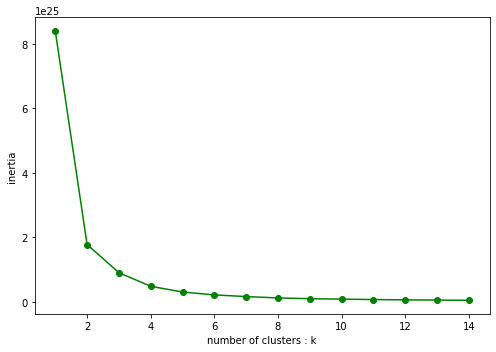

In [76]:
fig,ax = plt.subplots(1, figsize =(7,5))
plt.plot(range(1, 15),inertia_list,marker ='o',color ='green')
plt.xlabel('number of clusters : k')
plt.ylabel('inertia')
plt.tight_layout()
plt.show()

The optimal number of clusters is k=2, since at k=2, there is no significant decrease in loss function.

In [77]:
kmeans_classifier = KMeans(n_clusters=2)
y_kmeans = kmeans_classifier.fit_predict(BTC_ele)
centroids = kmeans_classifier.cluster_centers_

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn

In [306]:
centroids

array([[6.08558160e+03, 1.40431407e+04, 2.39617034e+03, 1.13443602e+10,
        1.77975604e+01, 1.07561185e+11, 7.71243805e-02],
       [4.74747082e+04, 7.44461169e+03, 6.96386976e+03, 6.65957005e+10,
        2.08099145e+01, 8.81746737e+11, 8.02983447e-02]])

Two centroids were given by kmeans cluster. The Bitcoin price evolution would be separated to three stages by these two centroids.

Finding the closest two time slot for two centroids as the bound of each stage. 

In [80]:
for i in range(len(BTC)):
    if 6080<= BTC['Price'][i] <= 6090:
        print(BTC.iloc[i])

Date                     2018-06-21
Price                       6083.69
AR                          1.25807
BR                          4553.12
Vol                     5.07981e+09
VIX                           14.64
MC                     106958465208
VMR                       0.0474933
Market Status        Fluctuation Up
Invest Suggestion         75% Hedge
Name: 903, dtype: object


In [81]:
for i in range(len(BTC)):
    if 47474<= BTC['Price'][i] <= 47600:
        print(BTC.iloc[i])

Date                   2021-02-12
Price                     47504.8
AR                        59.8247
BR                        33.3429
Vol                    7.6555e+10
VIX                         19.97
MC                   892364856136
VMR                     0.0857889
Market Status            Downturn
Invest Suggestion          All in
Name: 1865, dtype: object


In [82]:
BTC[BTC["Date"]=='2018-06-21']

Date    Price        AR           BR           Vol    VIX  \
903  2018-06-21  6083.69  1.258068  4553.122855  5.079810e+09  14.64   

               MC       VMR   Market Status Invest Suggestion  
903  106958465208  0.047493  Fluctuation Up         75% Hedge

In [83]:
BTC[BTC["Date"]=='2021-02-12']

Date     Price         AR         BR           Vol    VIX  \
1865  2021-02-12  47504.85  59.824663  33.342917  7.655504e+10  19.97   

                MC       VMR Market Status Invest Suggestion  
1865  892364856136  0.085789      Downturn            All in

In [84]:
BTC_k1 = BTC.head(903)
BTC_k2 = BTC.iloc[903:1865]
BTC_k3 = BTC.tail(1937-1865)

In [85]:
BTC_k2 = BTC_k2.reset_index(drop=True)
BTC_k3 = BTC_k3.reset_index(drop=True)

In [87]:
trace0 = go.Scatter(x= BTC_k1['Date'], y=BTC_k1['Price'],
                    mode='lines',marker_color='blue',name='Stage 1')
trace1 = go.Scatter(x= BTC_k2['Date'], y=BTC_k2['Price'],
                    mode='lines',marker_color='red',name='Stage 2')

trace2 = go.Scatter(x= BTC_k3['Date'], y=BTC_k3['Price'],
                    mode='lines',marker_color='orange',name='Stage 3')

trace3 = go.Scatter(x= ["2018-06-21", '2021-02-12'], y=[6085.58160, 47474.7082],
                    mode='markers',marker_color='green',name='K mean centroids',
                    marker=dict(color='LightSkyBlue',size=15),marker_symbol='star')

data = [trace0, trace1, trace2, trace3]

layout = go.Layout(title='Bitcoin price envolution stages by K-means', 
                   xaxis_title="Date",yaxis_title="Index", hovermode='x')

fig = go.Figure(data=data, layout=layout)

fig.update_layout(xaxis=dict(
    tickvals = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01','2016-07-01',
               '2016-08-01','2016-09-01','2016-10-01','2016-11-01','2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01','2017-07-01',
               '2017-08-01','2017-09-01','2017-10-01','2017-11-01','2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01','2018-07-01',
               '2018-08-01','2018-09-01','2018-10-01','2018-11-01','2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01','2019-07-01',
               '2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01','2020-07-01',
               '2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01','2021-05-01'],
    ticktext = ["Jan 2016", "Feb 2016", "Mar 2016", "Apr 2016", "May 2016", "Jun 2016","Jul 2016", "Aug 2016",
               "Sep 2016", "Oct 2016", "Nov 2016", "Dec 2016",
               "Jan 2017", "Feb 2017", "Mar 2017", "Apr 2017", "May 2017", "Jun 2017","Jul 2017", "Aug 2017",
               "Sep 2017", "Oct 2017", "Nov 2017", "Dec 2017",
               "Jan 2018", "Feb 2018", "Mar 2018", "Apr 2018", "May 2018", "Jun 2018","Jul 2018", "Aug 2018",
               "Sep 2018", "Oct 2018", "Nov 2018", "Dec 2018",
               "Jan 2019", "Feb 2019", "Mar 2019", "Apr 2019", "May 2019", "Jun 2019","Jul 2019", "Aug 2019",
               "Sep 2019", "Oct 2019", "Nov 2019", "Dec 2019",
               "Jan 2020", "Feb 2020", "Mar 2020", "Apr 2020", "May 2020", "Jun 2020","Jul 2020", "Aug 2020",
               "Sep 2020", "Oct 2020", "Nov 2020", "Dec 2020",
               "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021",'May 2021']))

pyo.plot(fig, filename = 'Bitcoin price envolution stages by K-means.html')

fig.show()

# VI. Trading Demo
### Trading strategy: Real label, By k-NN, by Logistic Regression, by Naive Bayes, By Gaussian SVM
This section will foucs on stimulating trading demo.


$\textbf{Real world trading stimulation:}$ Applying real label trading strategy and other strategies by classifiers for the time period Jan.1st 2021 to Apr.23th 2021 


$\textbf{Train set:}$ BTC from 2016-01-01 to 2020-12-31


$\textbf{Test set:}$ BTC from 2021-01-01 to 2021-04-23


The investment suggestion and trading strategy is stimulating the real market as much as possible. So there are four investment suggestion label generated before. Higher scale index means more risk to invest. So if the scale index is too high, it is time to sell all. Conversely, it is time to buy in. The reason why choose 75% hedge for Fluctuation Up is that no one know exactly how the market goes, so keep 25% in the pocket to lower the risk. The market is always surprised investors when they are chilled. On the other hand, keep 75% in the pocket when the label is Fluctuation Down to keep the money safer. Still holding 25% in the market to maintain the probability of the increasing. 

##### Investment suggestion

$\color{red}{\text{Sell All}}$

$\color{darkgreen}{\text{75% Hedge}}$

$\color{grey}{\text{25% Hedge}}$

$\color{lightGreen}{\text{All in}}$

The varibles used for all classifiers and cluster are: $\textbf{Price, AR, BR, Vol, VIX, MC, VMR}$

The label colume used is $\textbf{Investment Suggestion}$

## 1. Real world trading stimulation
### Daily return rate for BTC Jan.1st 2021 to Apr.23rd 2021

In [88]:
BTC2021

Date     Price           AR           BR           Vol    VIX  \
0    2021-01-01  29374.15   318.569478    28.319558  4.073030e+10  18.21   
1    2021-01-02  32127.27  1324.544307   180.147574  6.786542e+10  18.21   
2    2021-01-03  32782.02  3215.916461    60.160931  7.866524e+10  18.21   
3    2021-01-04  31971.91    15.392386   201.221050  8.116348e+10  26.97   
4    2021-01-05  33992.43   140.134408    13.700814  6.754732e+10  25.34   
..          ...       ...          ...          ...           ...    ...   
109  2021-04-19  56473.03    61.795912    43.455683  6.784932e+10  17.29   
110  2021-04-20  53906.09    10.334119    94.277648  5.492661e+10  18.68   
111  2021-04-21  51762.27    47.448141  1732.010255  7.479863e+10  17.50   
112  2021-04-22  51093.65     9.464989    87.159513  8.666867e+10  18.71   
113  2021-04-23  50050.87     1.040660    33.048041  4.901449e+10  17.33   

                MC       VMR     Market Status Invest Suggestion  
0     539051138108  0.075559    Fluctuation Up         75% Hedge  
1     546001594838  0.124295    Fluctuation Up         75% Hedge  
2     597205944669  0.131722    Fluctuation Up         75% Hedge  
3     609409213147  0.133184  Fluctuation Down         25% Hedge  
4     594384025391  0.113643          Downturn            All in  
..             ...       ...               ...               ...  
109  1041287672154  0.065159    Fluctuation Up         75% Hedge  
110  1055323526514  0.052047          Downturn            All in  
111  1007389534360  0.074250    Fluctuation Up         75% Hedge  
112   967372472375  0.089592          Downturn            All in  
113   954919230092  0.051328          Downturn            All in  

[114 rows x 10 columns]

In [89]:
return_rate = []

for i in range(len(BTC2021)):
    
    if i == 0:
        return_rate.append(0)
    else:
        rate = (BTC2021['Price'][i]-BTC2021['Price'][i-1])/BTC2021['Price'][i-1]
        return_rate.append(rate)

In [90]:
BTC2021.insert(10, 'Return rate', return_rate)

In [91]:
BTC2021

Date     Price           AR           BR           Vol    VIX  \
0    2021-01-01  29374.15   318.569478    28.319558  4.073030e+10  18.21   
1    2021-01-02  32127.27  1324.544307   180.147574  6.786542e+10  18.21   
2    2021-01-03  32782.02  3215.916461    60.160931  7.866524e+10  18.21   
3    2021-01-04  31971.91    15.392386   201.221050  8.116348e+10  26.97   
4    2021-01-05  33992.43   140.134408    13.700814  6.754732e+10  25.34   
..          ...       ...          ...          ...           ...    ...   
109  2021-04-19  56473.03    61.795912    43.455683  6.784932e+10  17.29   
110  2021-04-20  53906.09    10.334119    94.277648  5.492661e+10  18.68   
111  2021-04-21  51762.27    47.448141  1732.010255  7.479863e+10  17.50   
112  2021-04-22  51093.65     9.464989    87.159513  8.666867e+10  18.71   
113  2021-04-23  50050.87     1.040660    33.048041  4.901449e+10  17.33   

                MC       VMR     Market Status Invest Suggestion  Return rate  
0     539051138108  0.075559    Fluctuation Up         75% Hedge     0.000000  
1     546001594838  0.124295    Fluctuation Up         75% Hedge     0.093726  
2     597205944669  0.131722    Fluctuation Up         75% Hedge     0.020380  
3     609409213147  0.133184  Fluctuation Down         25% Hedge    -0.024712  
4     594384025391  0.113643          Downturn            All in     0.063197  
..             ...       ...               ...               ...          ...  
109  1041287672154  0.065159    Fluctuation Up         75% Hedge     0.013437  
110  1055323526514  0.052047          Downturn            All in    -0.045454  
111  1007389534360  0.074250    Fluctuation Up         75% Hedge    -0.039770  
112   967372472375  0.089592          Downturn            All in    -0.012917  
113   954919230092  0.051328          Downturn            All in    -0.020409  

[114 rows x 11 columns]

### > Real suggestion strategy

Following the assigned investment suggestions 

In [92]:
cash_bah = 10000
balance_bah = []

for i in range(len(BTC2021)):
    
    if BTC2021['Invest Suggestion'][i] == "Sell All":
        
        balance_bah.append(cash_bah)
        
    elif BTC2021['Invest Suggestion'][i] == "All in":
        
        cash_bah = cash_bah * (1 + BTC2021["Return rate"][i])
        balance_bah.append(cash_bah)
        
    elif BTC2021['Invest Suggestion'][i] == "75% Hedge":
        
        invested = 0.75 * cash_bah
        cash_bah = 0.25*cash_bah + invested*(1 + BTC2021["Return rate"][i])
        balance_bah.append(cash_bah)
        
    elif BTC2021['Invest Suggestion'][i] == "25% Hedge":
        
        invested = 0.25 * cash_bah
        cash_bah = 0.75*cash_bah + invested*(1 + BTC2021["Return rate"][i])
        balance_bah.append(cash_bah)
        
    else:
        print(BTC2021.iloc[i])
        

In [457]:
cash_bah

16456.98519953606

The final return of real suggestion strategy is 16456.99 USD

### > kNN label strategy
#### Finding best k for investment suggestion label

In [126]:
error_rates_knn = []

for k in range(2,50):

    X_train = BTC_train[['Price','AR', 'BR','Vol',"VIX","MC",'VMR']].values
    Y_train = BTC_train[["Invest Suggestion"]].values

    X_test = BTC2021[['Price','AR', 'BR','Vol',"VIX","MC",'VMR']].values
    Y_test = BTC2021[["Invest Suggestion"]].values

    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train,Y_train)

    prediction = knn_classifier.predict(X_test)
    error_rate = np.mean(prediction != Y_test)
    
    error_rates_knn.append(error_rate)

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Pleas

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Pleas

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Pleas

In [127]:
trace = go.Scatter(x= np.array(range(2, 50)), y=error_rates_knn,
                    mode='lines',marker_color='orange',name='error rates')

trace1 = go.Scatter(x= np.array(range(2, 50)), mode = 'markers',y=error_rates_knn,marker_color='red',name='k')

data = [trace,trace1]

layout = go.Layout(title='error rates for different k value', xaxis_title="k",yaxis_title="index", hovermode='x')

fig = go.Figure(data=data, layout=layout)

fig.show()

##### Since the error rates for different k remains the same, which means the prediction is super stable. Therefore, k = 10 will be randomly selected. for next part.

In [128]:
X_train = BTC_train[['Price','AR', 'BR','Vol',"VIX","MC",'VMR']].values
Y_train = BTC_train[["Invest Suggestion"]].values

X_test = BTC2021[['Price','AR', 'BR','Vol',"VIX","MC",'VMR']].values
Y_test = BTC2021[["Invest Suggestion"]].values

In [129]:
knn_classifier = KNeighborsClassifier(n_neighbors = 10)
knn_classifier.fit(X_train,Y_train)

prediction = knn_classifier.predict(X_test)
correct_rate_knn = np.mean(prediction == Y_test)

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [130]:
prediction

array(['All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All 

In [131]:
correct_rate_knn

0.543859649122807

The accuracy of kNN for investment suggestion label is 54.385%

In [132]:
cash_knn = 10000
balance_knn = []

for i in range(len(BTC2021)):
    
    if prediction[i] == "Sell All":
        
        balance_knn.append(cash_knn)
        
    elif prediction[i] == "All in":
        
        cash_knn = cash_knn * (1 + BTC2021["Return rate"][i])
        balance_knn.append(cash_knn)
        
    elif prediction[i] == "75% Hedge":
        
        invested = 0.75 * cash_knn
        cash_knn = 0.25*cash_knn + invested*(1 + BTC2021["Return rate"][i])
        balance_knn.append(cash_knn)
        
    elif prediction[i] == "25% Hedge":
        
        invested = 0.25 * cash_knn
        cash_knn = 0.75*cash_knn + invested*(1 + BTC2021["Return rate"][i])
        balance_knn.append(cash_knn)
        
    else:
        print(BTC2021.iloc[i])
        

In [133]:
cash_knn

17039.087088477456

The final return of kNN predicted investment suggestions is 17039.09 USD

### > Logistic Regression

In [134]:
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train,Y_train)

prediction = log_reg_classifier.predict(X_test)
correct_rate_logr = np.mean(prediction == Y_test)

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [135]:
prediction

array(['All in', '75% Hedge', '75% Hedge', '75% Hedge', '75% Hedge',
       '75% Hedge', '75% Hedge', '75% Hedge', 'All in', '75% Hedge',
       '75% Hedge', '75% Hedge', '75% Hedge', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', '75% Hedge', '75% Hedge',
       '75% Hedge', 'All in', 'All in', '75% Hedge', '75% Hedge',
       '75% Hedge', '75% Hedge', '75% Hedge', '75% Hedge', 'All in',
       '75% Hedge', '75% Hedge', 'All in', '75% Hedge', 'All in',
       '75% Hedge', 'All in', '75% Hedge', '75% Hedge', '75% Hedge',
       '75% Hedge', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       '75% Hedge', 'All in', 'All in', '25% Hedge', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All 

In [136]:
correct_rate_logr

0.4907663896583564

The accuracy of logistic regression for investment suggestion label is 49.077%

In [137]:
cash_logr = 10000
balance_logr = []

for i in range(len(BTC2021)):
    
    if prediction[i] == "Sell All":
        
        balance_logr.append(cash_logr)
        
    elif prediction[i] == "All in":
        
        cash_logr = cash_logr * (1 + BTC2021["Return rate"][i])
        balance_logr.append(cash_logr)
        
    elif prediction[i] == "75% Hedge":
        
        invested = 0.75 * cash_logr
        cash_logr = 0.25*cash_logr + invested*(1 + BTC2021["Return rate"][i])
        balance_logr.append(cash_logr)
        
    elif prediction[i] == "25% Hedge":
        
        invested = 0.25 * cash_logr
        cash_logr = 0.75*cash_logr + invested*(1 + BTC2021["Return rate"][i])
        balance_logr.append(cash_logr)
        
    else:
        print(BTC2021.iloc[i])

In [138]:
cash_logr

15755.464259493001

The final return of logistic regression predicted investment suggestions is 15755.46 USD

### > Naive Bayes strategy

In [139]:
NB_classifier = GaussianNB().fit(X_train,Y_train)
prediction = NB_classifier.predict(X_test)
correct_rate_nb = np.mean(prediction== Y_test)

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [140]:
prediction

array(['All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', '25% Hedge', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', '25% Hedge', '25% Hedge', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'Sell All', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All in', 'All in',
       'All in', 'All in', 'All in', 'All in', 'All

In [141]:
correct_rate_nb

0.5272391505078485

The accuracy of Naive Bayes for investment suggestion label is 52.723%

In [142]:
cash_nb = 10000
balance_nb = []

for i in range(len(BTC2021)):
    
    if prediction[i] == "Sell All":
        
        balance_nb.append(cash_nb)
        
    elif prediction[i] == "All in":
        
        cash_nb = cash_nb * (1 + BTC2021["Return rate"][i])
        balance_nb.append(cash_nb)
        
    elif prediction[i] == "75% Hedge":
        
        invested = 0.75 * cash_nb
        cash_nb = 0.25*cash_nb + invested*(1 + BTC2021["Return rate"][i])
        balance_nb.append(cash_nb)
        
    elif prediction[i] == "25% Hedge":
        
        invested = 0.25 * cash_nb
        cash_nb = 0.75*cash_nb + invested*(1 + BTC2021["Return rate"][i])
        balance_nb.append(cash_nb)
        
    else:
        print(BTC2021.iloc[i])

In [143]:
cash_nb

16768.452502315777

The final return of Naive Bayes predicted investment suggestions is 16768.45 USD

### > Gaussian SVM strategy

In [144]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [145]:
svm_classifier = svm.SVC(kernel ='linear')
svm_classifier.fit(X_train,Y_train)

prediction = svm_classifier.predict(X_test)
correct_rate_svm = svm_classifier.score(X_test, Y_test)

/Users/mapengfei/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [146]:
prediction

array(['25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge',
       '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge',
       '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge',
       '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge',
       '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge',
       '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge',
       '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge',
       '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge',
       '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge',
       '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge',
       '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge',
       '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge',
       '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge',
       '25% Hedge', '25% Hedge', '25% Hedge', '25% Hedge', '25% 

In [147]:
correct_rate_svm

0.08771929824561403

The accuracy of Gaussian SVM for investment suggestion label is 8.772%

In [148]:
cash_svm = 10000
balance_svm = []

for i in range(len(BTC2021)):
    
    if prediction[i] == "Sell All":
        
        balance_svm.append(cash_svm)
        
    elif prediction[i] == "All in":
        
        cash_svm = cash_svm * (1 + BTC2021["Return rate"][i])
        balance_svm.append(cash_svm)
        
    elif prediction[i] == "75% Hedge":
        
        invested = 0.75 * cash_svm
        cash_svm = 0.25*cash_svm + invested*(1 + BTC2021["Return rate"][i])
        balance_svm.append(cash_svm)
        
    elif prediction[i] == "25% Hedge":
        
        invested = 0.25 * cash_svm
        cash_svm = 0.75*cash_svm + invested*(1 + BTC2021["Return rate"][i])
        balance_svm.append(cash_svm)
        
    else:
        print(BTC2021.iloc[i])

In [149]:
cash_svm

11676.02030566169

The final return of Gaussian SVM predicted investment suggestions is 11676.02 USD

### Summary table of accuracies of four classifier prediction

In [150]:
data1 = {'Trading Strategy models':['kNN', "Logistic Regression", "Naive Bayes","Gaussian SVM"], 
        'Accuracy':[correct_rate_knn, correct_rate_logr, correct_rate_nb, correct_rate_svm]}

table2 = pd.DataFrame(data=data1)

In [151]:
table2

Trading Strategy models  Accuracy
0                     kNN  0.543860
1     Logistic Regression  0.490766
2             Naive Bayes  0.527239
3            Gaussian SVM  0.087719

It is clearly to see that, kNN still hold the highest accuracy for investment suggestion label

### Summary table of final returns of five trading strategies

In [160]:
data2 = {'Trading Strategy':['Real label','kNN', "Logistic Regression", "Naive Bayes","Gaussian SVM"], 
        'Final return':[cash_bah, cash_knn, cash_logr, cash_nb, cash_svm]}

table3 = pd.DataFrame(data=data2)

In [161]:
table3

Trading Strategy  Final return
0           Real label  16456.985200
1                  kNN  17039.087088
2  Logistic Regression  15755.464259
3          Naive Bayes  16768.452502
4         Gaussian SVM  11676.020306

kNN finally gained the highest money in the first 4 months in 2021 in trading demo.

## 2. Line Chart of trading strategies return

In [162]:
x_values = BTC2021['Date']

trace0 = go.Scatter(x= x_values, y=balance_bah,
                    mode='lines',marker_color='blue',name='Real label')

trace1 = go.Scatter(x= x_values, y=balance_knn,
                    mode='lines',marker_color='red',name='kNN')

trace2 = go.Scatter(x= x_values, y=balance_logr,
                    mode='lines',marker_color='purple',name='Logistic Regression')

trace3 = go.Scatter(x= x_values, y=balance_nb,
                    mode='lines',marker_color='orange',name='Naive Bayes')

trace4 = go.Scatter(x= x_values, y=balance_svm,
                    mode='lines',marker_color='green',name='Gaussian SVM')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(title='Trading Strategy stimulation', xaxis_title="Date",yaxis_title="USD", hovermode='x')

fig = go.Figure(data=data, layout=layout)

fig.update_layout(xaxis=dict(
    tickvals = ['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01'],
    ticktext = ["Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021","May 2021"]))

fig.update_layout(legend_title_text='Strategies and models')

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.2,
            showactive=True,
            buttons=list(
                [
                    dict(
                        label="Real label",
                        method="update",
                        args=[
                            {"visible": [True, False, False, False, False]},
                            {"yaxis.title.text": "Real label",},
                        ],
                    ),
                    dict(
                        label="kNN",
                        method="update",
                        args=[
                            {"visible": [False, True, False, False, False]},
                            {"yaxis.title.text": "kNN"},
                        ],
                    ),
                    dict(
                        label="Logistic Regression",
                        method="update",
                        args=[
                            {"visible": [False, False, True, False, False]},
                            {"yaxis.title.text": "Logistic Regression"},
                        ],
                    ),
                    dict(
                        label="Naive Bayes",
                        method="update",
                        args=[
                            {"visible": [False, False, False, True, False]},
                            {"yaxis.title.text": "Naive Bayes"}
                        ],
                    ),
                    dict(
                        label="SVM",
                        method="update",
                        args=[
                            {"visible": [False, False, False, False, True]},
                            {"yaxis.title.text": "SVM"}
                        ],
                    ),
                ]
            ),
        )
    ]
)

pyo.plot(fig, filename = 'Trading Strategy stimulation.html')

fig.show()

In [163]:
trace0 = go.Box(y=balance_bah, name='Real label', marker_color = 'blue')

trace1 = go.Box(y=balance_knn, name='kNN', marker_color = 'red')

trace2 = go.Box(y=balance_logr, name='Logistic Regression', marker_color = 'green')

trace3 = go.Box(y=balance_nb, name='Naive Bayes', marker_color = 'purple')

trace4 = go.Box(y=balance_svm, name='SVM', marker_color = 'orange')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(title='Trading Strategy stimulation', 
                   xaxis_title="Trading strategy",yaxis_title="USD", hovermode='x')

fig = go.Figure(data=data, layout=layout)

fig.update_layout(legend_title_text='Strategies and models')

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.2,
            showactive=True,
            buttons=list(
                [
                    dict(
                        label="Real label",
                        method="update",
                        args=[
                            {"visible": [True, False, False, False, False]},
                            {"yaxis.title.text": "real label",},
                        ],
                    ),
                    dict(
                        label="kNN",
                        method="update",
                        args=[
                            {"visible": [False, True, False, False, False]},
                            {"yaxis.title.text": "kNN"},
                        ],
                    ),
                    dict(
                        label="Logistic Regression",
                        method="update",
                        args=[
                            {"visible": [False, False, True, False, False]},
                            {"yaxis.title.text": "Logistic Regression"},
                        ],
                    ),
                    dict(
                        label="Naive Bayes",
                        method="update",
                        args=[
                            {"visible": [False, False, False, True, False]},
                            {"yaxis.title.text": "Naive Bayes"}
                        ],
                    ),
                    dict(
                        label="SVM",
                        method="update",
                        args=[
                            {"visible": [False, False, False, False, True]},
                            {"yaxis.title.text": "SVM"}
                        ],
                    ),
                ]
            ),
        )
    ]
)

pyo.plot(fig, filename = 'Trading Strategy stimulation.html')

fig.show()